In [2]:
import pandas as pd
import matplotlib as mp
import numpy as np
import os
import re

NM_TO_KM = 1.852001
DIRNAME = os.path.abspath('')
THETIS_CSV_PATH = os.path.join(DIRNAME, "../files_computed/thetis_all_with_computed.csv")
df_all = pd.read_csv(THETIS_CSV_PATH, dtype={"imo": str})
df_ferries = df_all[df_all.ship_type.isin(["Ro-pax ship", "Passenger ship"])]
df_ferries_2019 = df_ferries[df_ferries.reporting_period == 2019]
df_ferries_2019

,imo,name,ship_type,reporting_period,technical_efficiency,port_of_registry,home_port,ice_class,doc_issue_date,doc_expiry_date,...,annual_computed_distance,annual_computed_distance_km,annual_computed_pax,annual_computed_freight,annual_computed_average_speed,annual_computed_ratio_co2_from_pax,annual_computed_average_co2_emissions_per_transport_work_pax_km,computed_ecoscore_letter,technical_efficiency_eiv,technical_efficiency_eedi
12171,5383304,ASTORIA,Passenger ship,2019.0,EIV (169.16 gCO₂/t·nm),NaN,NaN,NaN,15/03/2020,30/06/2021,...,48804.089434,90385.222436,NaN,NaN,19.954570,NaN,1142.429189,E,169.16,NaN
12172,6417097,MARCO POLO,Passenger ship,2019.0,EIV (68.95 gCO₂/t·nm),NaN,NaN,IC,10/03/2020,30/06/2021,...,56504.754475,104646.861793,NaN,NaN,23.513507,NaN,352.332423,D,68.95,NaN
12173,6511128,RED STAR 1,Ro-pax ship,2019.0,EIV (23 gCO₂/t·nm),NaN,NaN,NaN,07/09/2020,30/06/2021,...,24789.436477,45910.061146,245.015606,106.382208,27.458171,0.587597,256.446946,C,23.00,NaN
12174,6602898,OCEAN MAJESTY,Passenger ship,2019.0,EIV (31.73 gCO₂/t·nm),Madeira,NaN,NaN,24/06/2020,30/06/2021,...,44800.950716,82971.405527,NaN,NaN,22.499012,NaN,565.361466,D,31.73,NaN
12176,7037806,IONIAN STAR,Ro-pax ship,2019.0,EIV (19.4 gCO₂/t·nm),NaN,NaN,NaN,04/08/2020,30/06/2021,...,31988.060303,59241.919669,272.423821,219.614633,26.637554,0.750000,516.689786,D,19.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24060,9824289,COLOR HYBRID,Ro-pax ship,2019.0,EEDI (24.78 gCO₂/t·nm),Sandefjord,NaN,IB,30/04/2020,30/06/2021,...,19178.805247,35519.166496,568.544406,340.805934,26.796806,0.760000,300.977159,D,NaN,24.78
24061,9824564,EXPRESS 4,Ro-pax ship,2019.0,EIV (1.17 gCO₂/t·nm),Aarhus,Aarhus,NaN,30/06/2020,30/06/2021,...,86540.493295,160273.080123,482.602865,365.797058,59.973462,0.985141,460.285929,D,1.17,NaN
24119,9830111,VOLCAN DE TAGORO,Ro-pax ship,2019.0,EIV (50.96 gCO₂/t·nm),SANTA CRUZ DE TENERIFE,LAS PALMAS DE GRAN CANARIA,NaN,13/04/2020,30/06/2021,...,38025.599099,70423.447557,139.788612,192.580563,50.079964,0.420582,894.178783,E,50.96,NaN
24180,9835719,WORLD EXPLORER (OCT-19)),Passenger ship,2019.0,EEDI (17.8 gCO₂/t·nm),Madeira,Madeira,IB,27/04/2020,30/06/2021,...,13363.180799,24748.624203,NaN,NaN,22.451805,NaN,482.634729,D,NaN,17.80


In [4]:
df_ferries_2019[df_ferries_2019.imo == '9601132']

,imo,name,ship_type,reporting_period,technical_efficiency,port_of_registry,home_port,ice_class,doc_issue_date,doc_expiry_date,...,annual_computed_distance,annual_computed_distance_km,annual_computed_pax,annual_computed_freight,annual_computed_average_speed,annual_computed_ratio_co2_from_pax,annual_computed_average_co2_emissions_per_transport_work_pax_km,computed_ecoscore_letter,technical_efficiency_eiv,technical_efficiency_eedi
20631,9601132,AIDASTELLA,Passenger ship,2019.0,EIV (18.07 gCO₂/t·nm),Genova,NaN,NaN,07/06/2020,30/06/2021,...,58499.877177,108341.831032,NaN,NaN,21.813733,NaN,220.701825,C,18.07,NaN


In [3]:
co2 = df_ferries_2019['annual_computed_average_co2_emissions_per_transport_work_pax_km']
co2.describe()

count      567.000000
mean       684.292439
std       2248.726953
min          0.000000
25%        182.140830
50%        314.740651
75%        569.643321
max      34015.840164
Name: annual_computed_average_co2_emissions_per_transport_work_pax_km, dtype: float64

In [4]:
co2.quantile(0.9)

917.9573877119938

In [5]:
co2_cut = co2[co2 < co2.quantile(0.95)]
co2_cut.shape

(538,)

Text(0, 0.5, 'Ships count (538 represented)')

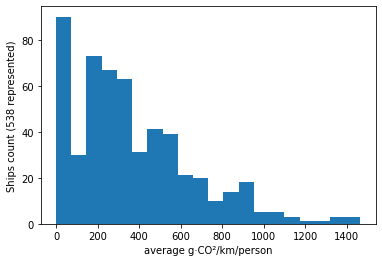

In [6]:
plot = co2_cut.plot.hist(bins=20)
plot.set_xlabel("average g·CO²/km/person")
plot.set_ylabel(f"Ships count ({len(co2_cut)} represented)")

In [7]:
counts, edges = np.histogram(co2_cut, 20)
edges

array([   0.        ,   73.30476603,  146.60953207,  219.9142981 ,
        293.21906414,  366.52383017,  439.8285962 ,  513.13336224,
        586.43812827,  659.74289431,  733.04766034,  806.35242638,
        879.65719241,  952.96195844, 1026.26672448, 1099.57149051,
       1172.87625655, 1246.18102258, 1319.48578861, 1392.79055465,
       1466.09532068])

<AxesSubplot:ylabel='Density'>

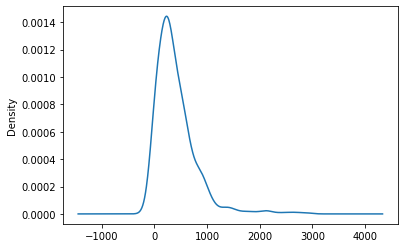

In [8]:
co2[co2 < 3000].plot.kde()

In [9]:
co2_cut.quantile([0.2, 0.4, 0.6, 0.8]) / 1.852

0.2     63.766765
0.4    130.417574
0.6    197.153517
0.8    310.960139
Name: annual_computed_average_co2_emissions_per_transport_work_pax_km, dtype: float64

In [10]:
car_co2_per_km = 193
plane_co2_per_km_pax = 144.6
# cf https://www.ademe.fr/expertises/mobilite-transports/chiffres-cles-observations/chiffres-cles
thresholds = [round(car_co2_per_km / 2), round(car_co2_per_km), round(plane_co2_per_km_pax * 2), round(plane_co2_per_km_pax * 4)]
thresholds

[96, 193, 289, 578]

<AxesSubplot:>

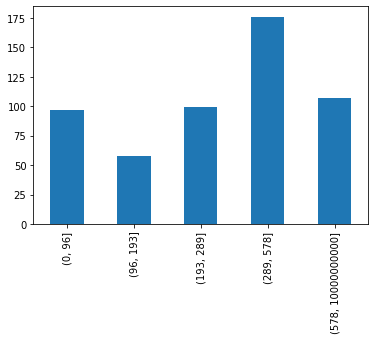

In [11]:
s = pd.cut(co2_cut, [0] + thresholds + [10**10]).value_counts(sort=False)
s
s.plot.bar()

Text(0, 0.5, 'Ships count')

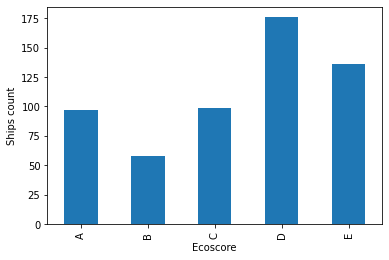

In [12]:
ecoscore_freqs = df_ferries_2019["computed_ecoscore_letter"].value_counts(sort=False)
ecoscore_freqs = ecoscore_freqs.reindex(index = ['A','B','C', 'D', 'E'])
plot = ecoscore_freqs.plot.bar()
plot.set_xlabel("Ecoscore")
plot.set_ylabel("Ships count")


In [13]:
def monitoring_methods(row):
    monitoring_methods = []
    for letter in ["a", "b", "c", "d"]:
        if not pd.isna(row[f"monitoring_method_{letter}"]):
            monitoring_methods.append(letter)
    return monitoring_methods
            
df_ferries_2019.monitoring_methods = df_ferries_2019.apply(lambda row: monitoring_methods(row), axis=1)
df_ferries_2019.monitoring_methods.apply(lambda ms: "-".join(ms)).value_counts()

a      229
b      134
c       97
        50
a-b     29
b-c     24
a-c      5
dtype: int64

In [14]:
df_all[~df_all.monitoring_method_d.isnull()]

,imo,name,ship_type,reporting_period,technical_efficiency,port_of_registry,home_port,ice_class,doc_issue_date,doc_expiry_date,...,annual_computed_distance,annual_computed_distance_km,annual_computed_pax,annual_computed_freight,annual_computed_average_speed,annual_computed_ratio_co2_from_pax,annual_computed_average_co2_emissions_per_transport_work_pax_km,computed_ecoscore_letter,technical_efficiency_eiv,technical_efficiency_eedi
18832,9470997,MOUNT KIBO,Chemical tanker,2019.0,EIV (7.93 gCO₂/t·nm),Monrovia,Monrovia,NaN,04/05/2020,30/06/2021,...,30465.416917,56421.982597,NaN,NaN,16.517071,NaN,NaN,NaN,7.93,NaN
18856,9472763,MP MR TANKER 1,Chemical tanker,2019.0,EIV (6.48 gCO₂/t·nm),SINGAPORE,NaN,NaN,30/04/2020,30/06/2021,...,26027.686396,48203.301232,NaN,NaN,24.389446,NaN,NaN,NaN,6.48,NaN


In [15]:
def eiv_value(technical_efficiency):
    if not isinstance(technical_efficiency, str):
        return None
    match_data = re.match(r"EIV \((.*) gCO₂/t·nm\)", technical_efficiency)
    if not match_data:
        return None
    return float(match_data.groups()[0])

def eedi_value(technical_efficiency):
    if not isinstance(technical_efficiency, str):
        return None
    match_data = re.match(r"EEDI \((.*) gCO₂/t·nm\)", technical_efficiency)
    if not match_data:
        return None
    return float(match_data.groups()[0])

df_all["technical_efficiency_eiv"] = df_all.technical_efficiency.apply(lambda te: eiv_value(te))
df_all["technical_efficiency_eedi"] = df_all.technical_efficiency.apply(lambda te: eedi_value(te))


df_ferries_2019 568


<AxesSubplot:xlabel='annual_computed_average_co2_emissions_per_transport_work_pax_km', ylabel='technical_efficiency_eiv'>

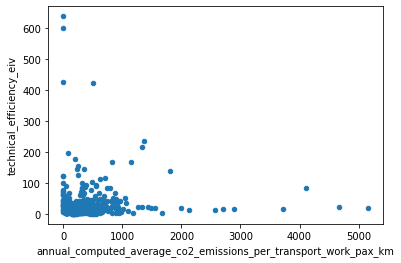